## IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import os

## LOAD DATA USING DATASET ONLINE RETAIL

In [2]:
path = 'C:/Project Narasio Data/'
os.listdir(path)

['CoffeeShop_Dataset.db',
 'Olist E-commerce.db',
 'online_retail.csv',
 'Restaurant_Dataset.db',
 'Retail_Online_Shop.db']

In [3]:
online_retail = pd.read_csv(path + 'online_retail.csv')

In [4]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


## DATA PREPARATION

In [5]:
from datetime import datetime as dt

online_retail['InvoiceDate'] = pd.to_datetime(online_retail['InvoiceDate'])

In [6]:
online_retail.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)

In [7]:
online_retail.dropna(subset=['CustomerID'], inplace=True)

In [8]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   CustomerID   824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


In [9]:
online_retail['Year'] = online_retail['InvoiceDate'].dt.year

In [10]:
online_retail['Month'] = online_retail['InvoiceDate'].dt.month

In [11]:
online_retail['Cohort'] = online_retail.apply(lambda row: (row['Year'] * 100) + (row['Month']), axis=1)

In [12]:
cohorts = online_retail.groupby('CustomerID')['Cohort'].min().reset_index()
cohorts.columns = ['CustomerID', 'FirstCohort']

data = online_retail.merge(cohorts, on='CustomerID', how='left')

In [13]:
cohorts.head()

,CustomerID,FirstCohort
0,12346.0,200912
1,12347.0,201010
2,12348.0,201009
3,12349.0,200912
4,12350.0,201102


## CREATE HEADERS FOR EACH COHORT

In [14]:
headers = data['Cohort'].value_counts().reset_index()
headers.columns = ['Cohorts', 'Count']
headers.head()
headers = headers.sort_values(['Cohorts'])['Cohorts'].to_list()

In [15]:
headers

[200912,
 201001,
 201002,
 201003,
 201004,
 201005,
 201006,
 201007,
 201008,
 201009,
 201010,
 201011,
 201012,
 201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112]

## PIVOT TABLE BASED ON COHORT

In [16]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Year,Month,Cohort,FirstCohort
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,200912,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,200912,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,200912,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,200912,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,200912,200912


In [17]:
data.dropna(inplace=True)

In [18]:
data['CohortDistance'] = data.apply(lambda row: (headers.index(row['Cohort']) - headers.index(row['FirstCohort']))
                                         if (row['FirstCohort'] != 0 and row['Cohort'] != 0) else np.nan, axis=1)

In [19]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Year,Month,Cohort,FirstCohort,CohortDistance
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,200912,200912,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,200912,200912,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,200912,200912,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,200912,200912,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,200912,200912,0


In [20]:
cohort_pivot = pd.pivot_table(data,
                              index='FirstCohort',
                              columns='CohortDistance',
                              values='CustomerID',
                              aggfunc=pd.Series.nunique)

In [21]:
cohort_pivot

CohortDistance,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
FirstCohort,,,,,,,,,,,,,,,,,,,,,
200912,1045.0,392.0,358.0,447.0,410.0,408.0,408.0,374.0,355.0,392.0,...,319.0,273.0,316.0,303.0,287.0,274.0,332.0,319.0,427.0,218.0
201001,394.0,86.0,119.0,120.0,110.0,115.0,105.0,91.0,114.0,134.0,...,60.0,86.0,74.0,69.0,73.0,93.0,73.0,88.0,29.0,NaN
201002,363.0,109.0,82.0,110.0,93.0,76.0,79.0,103.0,100.0,106.0,...,74.0,67.0,61.0,53.0,85.0,90.0,62.0,23.0,NaN,NaN
201003,436.0,95.0,113.0,103.0,100.0,87.0,105.0,130.0,126.0,50.0,...,74.0,76.0,69.0,74.0,89.0,93.0,33.0,NaN,NaN,NaN
201004,291.0,67.0,58.0,47.0,54.0,67.0,79.0,76.0,33.0,34.0,...,43.0,41.0,41.0,50.0,61.0,19.0,NaN,NaN,NaN,NaN
201005,254.0,49.0,45.0,49.0,48.0,66.0,56.0,33.0,17.0,22.0,...,33.0,36.0,42.0,40.0,12.0,NaN,NaN,NaN,NaN,NaN
201006,269.0,58.0,53.0,55.0,62.0,76.0,35.0,25.0,22.0,32.0,...,33.0,37.0,55.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
201007,183.0,38.0,37.0,52.0,55.0,28.0,21.0,28.0,26.0,22.0,...,32.0,45.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201008,158.0,39.0,50.0,51.0,29.0,21.0,16.0,22.0,23.0,21.0,...,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
cohort_pivot = cohort_pivot.div(cohort_pivot[0],axis=0)

In [23]:
cohort_pivot

CohortDistance,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
FirstCohort,,,,,,,,,,,,,,,,,,,,,
200912,1.0,0.375120,0.342584,0.427751,0.392344,0.390431,0.390431,0.357895,0.339713,0.375120,...,0.305263,0.261244,0.302392,0.289952,0.274641,0.262201,0.317703,0.305263,0.408612,0.208612
201001,1.0,0.218274,0.302030,0.304569,0.279188,0.291878,0.266497,0.230964,0.289340,0.340102,...,0.152284,0.218274,0.187817,0.175127,0.185279,0.236041,0.185279,0.223350,0.073604,NaN
201002,1.0,0.300275,0.225895,0.303030,0.256198,0.209366,0.217631,0.283747,0.275482,0.292011,...,0.203857,0.184573,0.168044,0.146006,0.234160,0.247934,0.170799,0.063361,NaN,NaN
201003,1.0,0.217890,0.259174,0.236239,0.229358,0.199541,0.240826,0.298165,0.288991,0.114679,...,0.169725,0.174312,0.158257,0.169725,0.204128,0.213303,0.075688,NaN,NaN,NaN
201004,1.0,0.230241,0.199313,0.161512,0.185567,0.230241,0.271478,0.261168,0.113402,0.116838,...,0.147766,0.140893,0.140893,0.171821,0.209622,0.065292,NaN,NaN,NaN,NaN
201005,1.0,0.192913,0.177165,0.192913,0.188976,0.259843,0.220472,0.129921,0.066929,0.086614,...,0.129921,0.141732,0.165354,0.157480,0.047244,NaN,NaN,NaN,NaN,NaN
201006,1.0,0.215613,0.197026,0.204461,0.230483,0.282528,0.130112,0.092937,0.081784,0.118959,...,0.122677,0.137546,0.204461,0.059480,NaN,NaN,NaN,NaN,NaN,NaN
201007,1.0,0.207650,0.202186,0.284153,0.300546,0.153005,0.114754,0.153005,0.142077,0.120219,...,0.174863,0.245902,0.092896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201008,1.0,0.246835,0.316456,0.322785,0.183544,0.132911,0.101266,0.139241,0.145570,0.132911,...,0.202532,0.069620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DISPLAY INTO HEATMAP

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

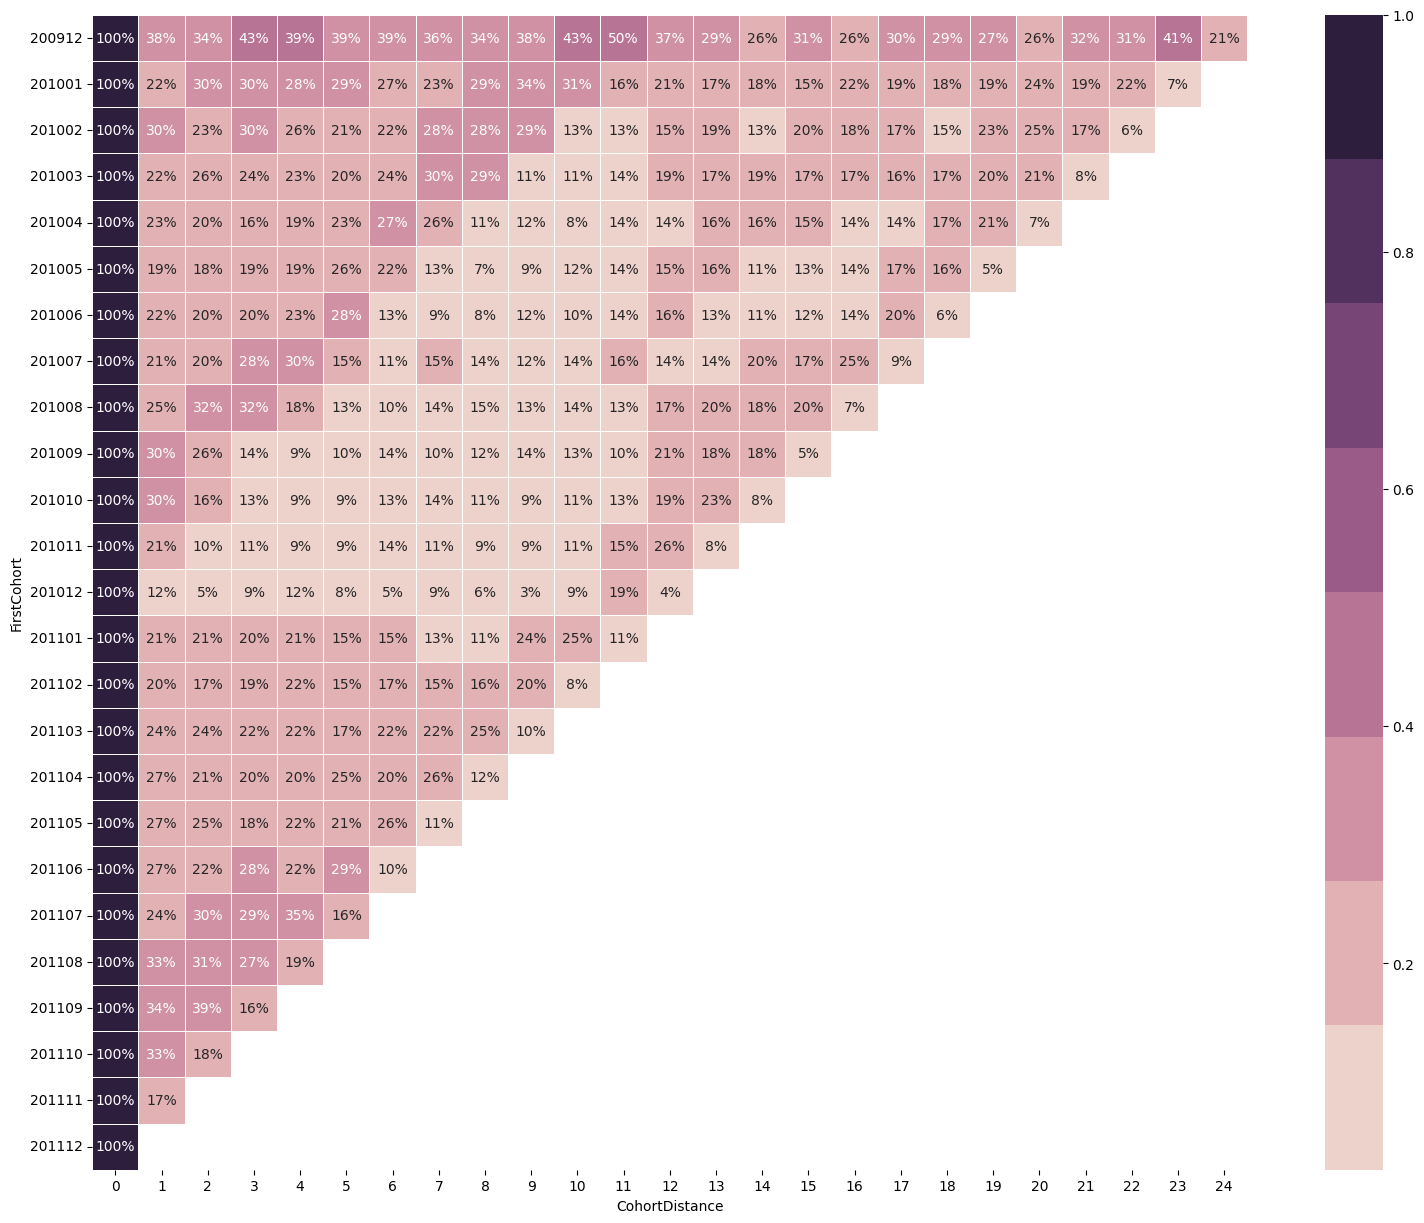

In [26]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(cohort_pivot, annot=True, fmt='.00%', mask=cohort_pivot.isnull(), ax=ax, square=True, linewidths=.5, cmap=sns.cubehelix_palette(8))

plt.show()